<a href="https://colab.research.google.com/github/vivekprj0712/Lok-Sabha-Election-2004-2024-Data-Analysis-Visualization/blob/master/Hypo_LSE_Vihang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = "https://en.wikipedia.org/wiki/2024_Indian_general_election#Results_by_Region"

page = requests.get(url)
soup = BeautifulSoup(page.text , 'html')

In [ ]:
#print(soup.prettify)

In [ ]:
#soup.find_all('table')[16]

In [ ]:
opinion_polls = soup.find_all('table' , class_='wikitable')[6]

In [ ]:
print(opinion_polls)

<table class="wikitable" style="text-align:center;font-size:95%;line-height:16px;">
<caption>Vote share projections
</caption>
<tbody><tr>
<th rowspan="2">Polling agency
</th>
<th rowspan="2">Date published
</th>
<th rowspan="2">Sample size
</th>
<th rowspan="2">Margin of error
</th>
<td bgcolor="#F98C1F">
</td>
<td bgcolor="#00B7EB">
</td>
<td bgcolor="grey">
</td>
<th rowspan="2">Lead
</th></tr>
<tr>
<th><a href="/wiki/National_Democratic_Alliance" title="National Democratic Alliance">NDA</a>
</th>
<th><a href="/wiki/Indian_National_Developmental_Inclusive_Alliance" title="Indian National Developmental Inclusive Alliance">INDIA</a>
</th>
<th>Others
</th></tr>
<tr>
<td><a href="/wiki/ABP_News" title="ABP News">ABP News</a>-<a href="/wiki/CVoter" title="CVoter">CVoter</a>
</td>
<td><i>April 2024</i><sup class="reference" id="cite_ref-abpapr_216-0"><a href="#cite_note-abpapr-216">[212]</a></sup>
</td>
<td>57,566
</td>
<td>±3–5%
</td>
<td bgcolor="#F98C1F"><b>46.6</b>
</td>
<td>39.8
</td

In [ ]:
t = opinion_polls.find_all('th')
titles = [title.text.strip() for title in t][:8]
print(titles)

['Polling agency', 'Date published', 'Sample size', 'Margin of error', 'Lead', 'NDA', 'INDIA', 'Others']


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns = titles)
df

,Polling agency,Date published,Sample size,Margin of error,Lead,NDA,INDIA,Others


In [ ]:
col_data = opinion_polls.find_all('tr')

In [ ]:
#print(col_data)

In [ ]:
for row in col_data[2:13]:
  r_data = row.find_all('td')
  row_data = [data.text.strip() for data in r_data]
  print(row_data)
  l=len(df)
  df.loc[l] = row_data

['ABP News-CVoter', 'April 2024[212]', '57,566', '±3–5%', '46.6', '39.8', '13.6', '6.8']
['News 18', 'March 2024[213]', '118,616', '±4%', '48', '32', '20', '16']
['ABP News-CVoter', 'March 2024[214]', '41,762[215]', '±5%', '46', '39', '15', '7']
['Times Now-ETG', 'March 2024[216]', '323,357[217]', '±3%', '52', '42', '6', '10']
['Zee News-Matrize', 'February 2024[218]', '167,843', '±2%', '43.6', '27.7', '24.9', '15.9']
['India Today-CVoter', 'February 2024[219]', '149,092[220]', '±3–5%', '45', '38', '17', '8']
['Times Now-ETG', 'February 2024[221]', '156,843[222]', '±2%', '41.8', '28.6', '29.6', '13.2']
['ABP News-CVoter', 'December 2023[223]', '200,000', '±3–5%', '42', '38', '20', '4']
['Times Now-ETG', 'December 2023[224][225]', '147,231[226]', '±3%', '44', '39', '17', '5']
['India TV-CNX', 'October 2023[227][228]', '54,250', '±3%', '43.4', '39.1', '17.5', '4.3']
['Times Now-ETG', 'October 2023[229]', '135,100[230]', '±3%', '42.6', '40.2', '17.2', '2.4']


In [ ]:
df

,Polling agency,Date published,Sample size,Margin of error,Lead,NDA,INDIA,Others
0,ABP News-CVoter,April 2024[212],"57,566",±3–5%,46.6,39.8,13.6,6.8
1,News 18,March 2024[213],"118,616",±4%,48,32,20,16
2,ABP News-CVoter,March 2024[214],"41,762[215]",±5%,46,39,15,7
3,Times Now-ETG,March 2024[216],"323,357[217]",±3%,52,42,6,10
4,Zee News-Matrize,February 2024[218],"167,843",±2%,43.6,27.7,24.9,15.9
5,India Today-CVoter,February 2024[219],"149,092[220]",±3–5%,45,38,17,8
6,Times Now-ETG,February 2024[221],"156,843[222]",±2%,41.8,28.6,29.6,13.2
7,ABP News-CVoter,December 2023[223],"200,000",±3–5%,42,38,20,4
8,Times Now-ETG,December 2023[224][225],"147,231[226]",±3%,44,39,17,5
9,India TV-CNX,October 2023[227][228],"54,250",±3%,43.4,39.1,17.5,4.3


In [ ]:
df.rename(columns={'Lead':'NDA' , 'NDA':'INDIA' , 'INDIA':'Others' , 'Others':'Lead'},inplace=True)
df

,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
0,ABP News-CVoter,April 2024[212],"57,566",±3–5%,46.6,39.8,13.6,6.8
1,News 18,March 2024[213],"118,616",±4%,48,32,20,16
2,ABP News-CVoter,March 2024[214],"41,762[215]",±5%,46,39,15,7
3,Times Now-ETG,March 2024[216],"323,357[217]",±3%,52,42,6,10
4,Zee News-Matrize,February 2024[218],"167,843",±2%,43.6,27.7,24.9,15.9
5,India Today-CVoter,February 2024[219],"149,092[220]",±3–5%,45,38,17,8
6,Times Now-ETG,February 2024[221],"156,843[222]",±2%,41.8,28.6,29.6,13.2
7,ABP News-CVoter,December 2023[223],"200,000",±3–5%,42,38,20,4
8,Times Now-ETG,December 2023[224][225],"147,231[226]",±3%,44,39,17,5
9,India TV-CNX,October 2023[227][228],"54,250",±3%,43.4,39.1,17.5,4.3


In [ ]:
#l=df['Date published'].str.split("[")[0]
#print(l)
df['Date published'] = df['Date published'].apply(lambda x: x.split('[')[0] if '[' in str(x) else x)
df

,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
0,ABP News-CVoter,April 2024,"57,566",±3–5%,46.6,39.8,13.6,6.8
1,News 18,March 2024,"118,616",±4%,48,32,20,16
2,ABP News-CVoter,March 2024,"41,762[215]",±5%,46,39,15,7
3,Times Now-ETG,March 2024,"323,357[217]",±3%,52,42,6,10
4,Zee News-Matrize,February 2024,"167,843",±2%,43.6,27.7,24.9,15.9
5,India Today-CVoter,February 2024,"149,092[220]",±3–5%,45,38,17,8
6,Times Now-ETG,February 2024,"156,843[222]",±2%,41.8,28.6,29.6,13.2
7,ABP News-CVoter,December 2023,"200,000",±3–5%,42,38,20,4
8,Times Now-ETG,December 2023,"147,231[226]",±3%,44,39,17,5
9,India TV-CNX,October 2023,"54,250",±3%,43.4,39.1,17.5,4.3


In [ ]:
df['Sample size'] = df['Sample size'].apply(lambda x: x.split('[')[0] if '[' in str(x) else x)
df

,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
0,ABP News-CVoter,April 2024,"57,566",±3–5%,46.6,39.8,13.6,6.8
1,News 18,March 2024,"118,616",±4%,48,32,20,16
2,ABP News-CVoter,March 2024,"41,762",±5%,46,39,15,7
3,Times Now-ETG,March 2024,"323,357",±3%,52,42,6,10
4,Zee News-Matrize,February 2024,"167,843",±2%,43.6,27.7,24.9,15.9
5,India Today-CVoter,February 2024,"149,092",±3–5%,45,38,17,8
6,Times Now-ETG,February 2024,"156,843",±2%,41.8,28.6,29.6,13.2
7,ABP News-CVoter,December 2023,"200,000",±3–5%,42,38,20,4
8,Times Now-ETG,December 2023,"147,231",±3%,44,39,17,5
9,India TV-CNX,October 2023,"54,250",±3%,43.4,39.1,17.5,4.3


In [ ]:
df_april = df.loc[df['Date published']=='April 2024']
df_april


,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
0,ABP News-CVoter,April 2024,"57,566",±3–5%,46.6,39.8,13.6,6.8


In [ ]:
df_abp = df.loc[df["Polling agency"]=="ABP News-CVoter"]
df_abp

,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
0,ABP News-CVoter,April 2024,"57,566",±3–5%,46.6,39.8,13.6,6.8
2,ABP News-CVoter,March 2024,"41,762",±5%,46,39,15,7
7,ABP News-CVoter,December 2023,"200,000",±3–5%,42,38,20,4


In [ ]:
df['Sample size'] = df['Sample size'].str.replace(',', '').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Polling agency   11 non-null     object
 1   Date published   11 non-null     object
 2   Sample size      11 non-null     int64 
 3   Margin of error  11 non-null     object
 4   NDA              11 non-null     object
 5   INDIA            11 non-null     object
 6   Others           11 non-null     object
 7   Lead             11 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [ ]:
df_big_sample = df[df['Sample size']>100000]
df_big_sample

,Polling agency,Date published,Sample size,Margin of error,NDA,INDIA,Others,Lead
1,News 18,March 2024,118616,±4%,48,32,20,16
3,Times Now-ETG,March 2024,323357,±3%,52,42,6,10
4,Zee News-Matrize,February 2024,167843,±2%,43.6,27.7,24.9,15.9
5,India Today-CVoter,February 2024,149092,±3–5%,45,38,17,8
6,Times Now-ETG,February 2024,156843,±2%,41.8,28.6,29.6,13.2
7,ABP News-CVoter,December 2023,200000,±3–5%,42,38,20,4
8,Times Now-ETG,December 2023,147231,±3%,44,39,17,5
10,Times Now-ETG,October 2023,135100,±3%,42.6,40.2,17.2,2.4


In [ ]:
df_exit_polls = pd.read_excel('exit_polls.xlsx')

In [ ]:
df_exit_polls.head()

,Agency,NDA,INDIA,Others,Lead
0,2019 election results,353,91,99,81
1,ABP News-CVoter[251],368±15,167±15,8±4,96
2,Dainik Bhaskar[252],316±34,173±28,41±8,44
3,DB Live[253],221±20,275±15,38±10,3
4,India Today-Axis My India[254],381±20,148±18,14±6,109


In [ ]:
df_exit_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Agency  16 non-null     object
 1   NDA     16 non-null     object
 2   INDIA   16 non-null     object
 3   Others  16 non-null     object
 4   Lead    16 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 768.0+ bytes


In [ ]:
df_exit_polls['Agency'] = df_exit_polls['Agency'].apply(lambda x: x.split("[")[0] if "[" in x else x)

In [ ]:
df_exit_polls.tail()

,Agency,NDA,INDIA,Others,Lead
11,Republic TV-Matrize,360±8,126±8,30,88
12,Republic TV-PMarq,359,154,30,87
13,Times Now-ETG,358,152,33,86
14,TV9 Bharatvarsh - People's Insight - Polstrat,346,162,35,74
15,2024 election results,293,234,16,21


In [ ]:
df_exit_polls['NDA'] = df_exit_polls['NDA'].str[:3]


In [ ]:
df_exit_polls['Others'] = df_exit_polls['Others'].str[:2]

In [ ]:
df_exit_polls['INDIA'] = df_exit_polls['INDIA'].str[:3]


In [ ]:
df_exit_polls.drop([0,12,13,14,15],inplace=True)

In [ ]:
df_exit_polls.drop([5],inplace=True)

In [ ]:
df_exit_polls.drop(['Others'],axis=1,inplace=True)

In [ ]:
df_exit_polls

,Agency,NDA,INDIA,Lead
1,ABP News-CVoter,368,167,96
2,Dainik Bhaskar,316,173,44
3,DB Live,221,275,3
4,India Today-Axis My India,381,148,109
6,India TV-CNX,386,134,96
7,NDTV-Jan Ki Baat,377,151,105
8,News18-CNBC,362,132,90
9,News 24-Today's Chanakya,400,107,128
10,News Nation,360,161,88
11,Republic TV-Matrize,360,126,88


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


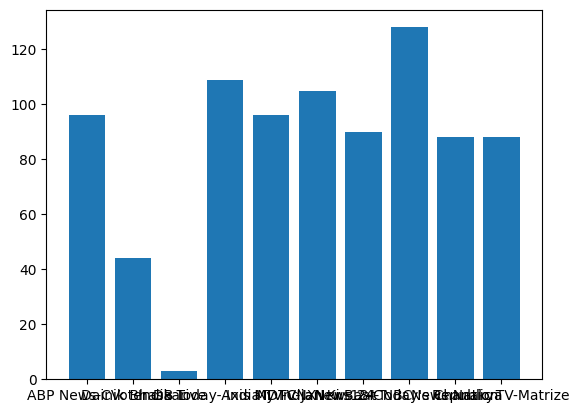

In [ ]:
plt.bar(df_exit_polls['Agency'],df_exit_polls['Lead'])
plt.show()

In [ ]:
df_exit_polls.sort_values(by='INDIA')

,Agency,NDA,INDIA,Lead
9,News 24-Today's Chanakya,400,107,128
11,Republic TV-Matrize,360,126,88
8,News18-CNBC,362,132,90
6,India TV-CNX,386,134,96
4,India Today-Axis My India,381,148,109
7,NDTV-Jan Ki Baat,377,151,105
10,News Nation,360,161,88
1,ABP News-CVoter,368,167,96
2,Dainik Bhaskar,316,173,44
3,DB Live,221,275,3


In [ ]:
df_opinion_polls = pd.read_excel('Opinion_polls.xlsx')

In [ ]:
df_opinion_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 1 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Agency        17 non-null     object
 1   Date          18 non-null     object
 2   Sample        18 non-null     object
 3   Margin error  18 non-null     object
 4   NDA           18 non-null     object
 5   INDIA         18 non-null     object
 6   Others        18 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


In [ ]:
df_exit_polls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Agency  10 non-null     object
 1   NDA     10 non-null     object
 2   INDIA   10 non-null     object
 3   Lead    10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes


In [ ]:
df_opinion_polls

,Agency,Date,Sample,Margin error,NDA,INDIA,Others
1,TV9 Bharatvarsh - People's Insight - Polstrat,April 2024[236],2500000,0.03,362,149,32
3,Times Now-ETG,April 2024[237],"271,292[238]",±3%,384,118,41
4,News18,March 2024[239],"118,616[240]",±4%,411,105,27
6,India TV-CNX,March 2024[242],"162,900[243]",±3%,378,98,67
8,Zee News-Matrize,February 2024[218],167843,±2%,377,93,73
9,India Today-CVoter,February 2024[245],"149,092[246]",±3–5%,335,166,42
10,Times Now-ETG,February 2024[247],156843,±2%,366,104,73
13,India TV-CNX,October 2023[227][228],54250,±3%,315,172,56
16,India Today-CVoter,August 2023[234],160438,±3–5%,306,193,54
18,India Today-CVoter,January 2023[249],140917,±3–5%,298,153,92


In [ ]:
df_opinion_polls.drop([7,11,12,14,15,17],inplace=True)

In [ ]:
df_opinion_polls.drop([2,5],inplace=True)

In [ ]:
df_opinion_polls.drop([0,19],inplace=True)

In [ ]:
ex = pd.DataFrame(df_exit_polls['NDA'].reset_index(drop=True))

,NDA
0,368
1,316
2,221
3,381
4,386
5,377
6,362
7,400
8,360
9,360


HYPOTHESIS TESTING : EXIT POLLS VS OPINION POLLS


In [ ]:
ex['NDA'] = ex['NDA'].astype(int)

In [ ]:
op['NDA'] = op['NDA'].astype(int)

In [ ]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NDA     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [ ]:
op = pd.DataFrame(df_opinion_polls['NDA'].reset_index(drop=True))

In [ ]:
op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NDA     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
h0 = 'exit polls and opinion polls are similar'
h1 = 'exit polls and opinion polls are not similar'
alpha = 0.01

_ , p = ttest_ind(ex['NDA'], op['NDA'])
print(p)

if(p<alpha):
  print("h0 is rejected and hence",h1)
else:
  print("h0 is not rejected and hence",h0)


0.9960997056527717
h0 is not rejected and hence exit polls and opinion polls are similar


HYPOTHESIS TESTING : WINNING PARTY AND TURNOUT


In [ ]:
dfe = pd.read_excel('/content/Final_Election_Data (2004-2024).xlsx')

In [ ]:
dfe

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004
...,...,...,...,...,...,...,...,...,...,...,...
2708,Wardha,GEN,Maharashtra,Amar Sharadrao Kale,Nationalist Congress Party – Sharadchandra Pawar,1682771,1095012,65.1,81648,7.5,2024
2709,Wayanad,GEN,Kerala,Rahul Gandhi,Indian National Congress,1462423,1084653,74.2,364422,33.6,2024
2710,West Delhi,GEN,Delhi,Kamaljeet Sehrawat,Bharatiya Janta Party,2587977,1524494,58.9,199013,13.1,2024
2711,Yavatmal-Washi,GEN,Maharashtra,Sanjay Uttamrao Deshmukh,Shiv Sena (Uddhav Balasaheb Thackrey),1940916,1225530,63.1,94473,7.7,2024


In [ ]:
dm = dfe.groupby('Party')['Turnout'].mean()

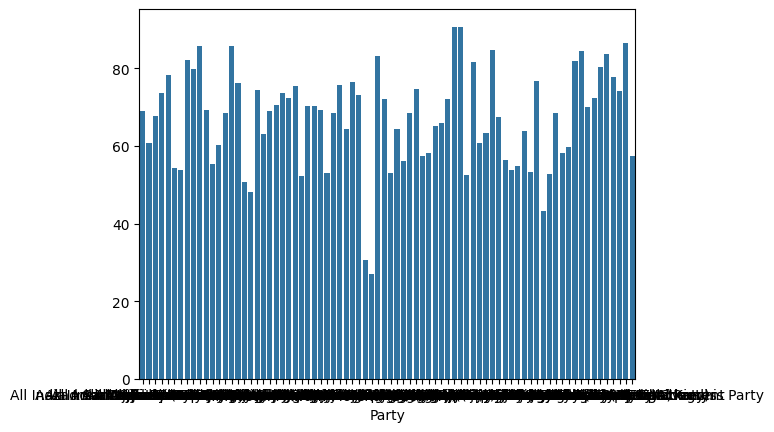

In [ ]:
#sns.barplot(x=dm.index,y=dm.values)
#plt.show()

In [ ]:
dfe_bjp = dfe.loc[dfe['Party']=='Bharatiya Janta Party']
dfe_bjp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 3 to 2710
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            1078 non-null   object 
 1   Caste              1078 non-null   object 
 2   State              1078 non-null   object 
 3   Winning Candidate  1078 non-null   object 
 4   Party              1078 non-null   object 
 5   Electors           1078 non-null   int64  
 6   Votes              1078 non-null   int64  
 7   Turnout            1078 non-null   float64
 8   Margin             1078 non-null   int64  
 9   Margin %           1078 non-null   float64
 10  Year               1078 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 101.1+ KB


In [ ]:
dfe_inc = dfe.loc[dfe['Party']=='Indian National Congress']
dfe_inc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 8 to 2712
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            546 non-null    object 
 1   Caste              546 non-null    object 
 2   State              546 non-null    object 
 3   Winning Candidate  546 non-null    object 
 4   Party              546 non-null    object 
 5   Electors           546 non-null    int64  
 6   Votes              546 non-null    int64  
 7   Turnout            546 non-null    float64
 8   Margin             546 non-null    int64  
 9   Margin %           546 non-null    float64
 10  Year               546 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 51.2+ KB


In [ ]:
dfe_others = dfe.loc[dfe['Party']!='Bhartiya Janta Party']
dfe_others.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 0 to 2712
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PC Name            2713 non-null   object 
 1   Caste              2713 non-null   object 
 2   State              2713 non-null   object 
 3   Winning Candidate  2713 non-null   object 
 4   Party              2713 non-null   object 
 5   Electors           2713 non-null   int64  
 6   Votes              2713 non-null   int64  
 7   Turnout            2713 non-null   float64
 8   Margin             2713 non-null   int64  
 9   Margin %           2713 non-null   float64
 10  Year               2713 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 254.3+ KB


In [ ]:
h0 = 'The winning party does not significantly influence voter turnout in the constituencies they win.'
ha = 'The winning party significantly influences voter turnout in the constituencies they win.'

alpha = 0.05

_ , p = ttest_ind(dfe_bjp['Turnout'], dfe_inc['Turnout'])
print(p)

if(p<alpha):
  print("h0 is rejected and hence",ha)
else:
  print("h0 is not rejected and hence",h0)

0.03560457758658298
h0 is rejected and hence The winning party significantly influences voter turnout in the constituencies they win.


In [ ]:
dfe.head()

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
0,Adilabad,GEN,Andhra Pradesh,Madhusudhan Reddy Takkala,Telangana Rashtra Samithi,1140834,830601,72.8,40974,4.9,2004
1,Adoor,GEN,Kerala,Chengara Surendran,Communist Party Of India,960122,682227,71.1,54534,8.0,2004
2,Agra,GEN,Uttar Pradesh,Raj Babbar,Samajwadi Party,1430713,642675,44.9,57342,8.9,2004
3,Ahmedabad,GEN,Gujarat,Harin Pathak,Bharatiya Janta Party,1382793,548391,39.7,77605,14.2,2004
4,Ahmednagar,GEN,Maharashtra,Gadakh Tukaram Gangadhar,Nationalist Congress Party,1295593,686554,53.0,75077,10.9,2004


In [ ]:
print(dfe.loc[dfe['Caste']=='GEN']['Caste'].count())
print(dfe.loc[dfe['Caste']=='ST']['Caste'].count())
print(dfe.loc[dfe['Caste']=='SC']['Caste'].count())
print(dfe.loc[dfe['Caste']=='GENP']['Caste'].count())
print(dfe['Caste'].unique())

2006
231
414
4
['GEN' 'ST' 'SC' 'Unspecified' 'GENP']


In [ ]:
dfe_24 = dfe[dfe['Year']==2024]
dfe_24.head()

,PC Name,Caste,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,Year
2170,Adilabad,ST,Telangana,Godam Nagesh,Bharatiya Janta Party,1650175,1235597,74.9,90652,7.3,2024
2171,Agra,SC,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janta Party,2072685,1123779,54.2,271294,24.1,2024
2172,Ahmadnagar,GEN,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,1981866,1325477,66.9,28929,2.2,2024
2173,Ahmedabad East,GEN,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,2038162,1128339,55.4,461755,40.9,2024
2174,Ahmedabad West,SC,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,1726987,966646,56.0,286437,29.6,2024


In [ ]:
print(dfe_24['Margin'].mean())
print(dfe_24.groupby('Caste')['Margin'].median())

165009.5211786372
Caste
GEN            118176.0
GENP            65579.5
SC              92979.0
ST             148709.5
Unspecified    196348.5
Name: Margin, dtype: float64
